## Linear Regression Model

- It is the linear approach for modelling the relationship between one or more dependent and independent variables(features).
- It has applications that falls into one of the following two broad categories.
    1. If the goal is `prediction`, `forecasting` or `error-detection`.
    2. If the goal is to `analyse` or to explain `relationship/variation` between dependent and independent feattures. 
- <br><img src="s1.png" width=150px height=150px align="left"><br><br><br><br><br><br><br><br><br><br><br> 
- In linear regression, the observations (`red`) are assumed to be the result of random deviations (`green`) from an underlying relationship (`blue`) between a `dependent` variable (`y`) and an `independent` variable (`x`).
- In other words, `red` are the actual value while its reflection marked in`green`on blue line is the predicted value.
- Thus, `e` i.e error variable is added in the equation.

### Equation
<br>
<img src="s2.png" width=500px height=500px align="left">

- `y` is the `dependent` variable.
- `yhat` is the `predicted` value.
- `X` is the `n-dimensional Column Vector` known as `input` variable or `independent` variable.
- `B` is the intercept.
- Note: Xi0 = b0 = 1

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Attribute Information:

- The inputs are as follows
- SEX
- LENGTH
- DIAMETER
- HEIGHT
- Whole weight
- Shucked weight
- Viscera weight
- Shell weight

- The output is as follow
- Y= RING

In [23]:
df = pd.read_csv('../Dataset/abalone.csv')

In [24]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [25]:
df = df.drop(['Sex'], axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [27]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [28]:
df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Data Visualization

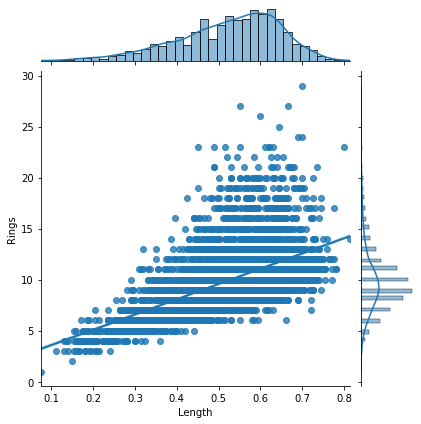

In [30]:
sns.jointplot(x=df['Length'], y=df['Rings'], data=df, kind='reg')

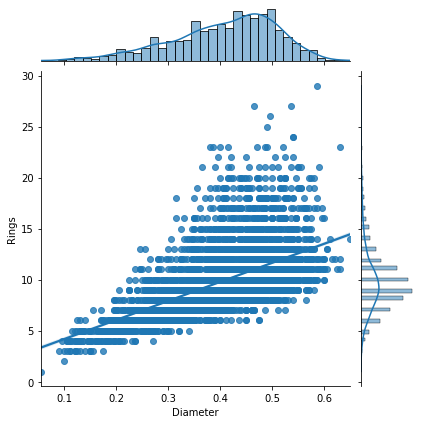

In [31]:
sns.jointplot(x=df['Diameter'], y=df['Rings'], data=df, kind='reg')

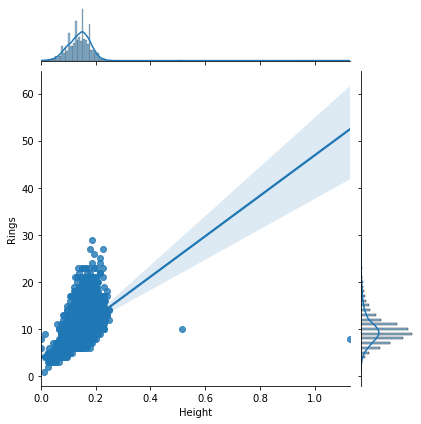

In [32]:
sns.jointplot(x=df['Height'], y=df['Rings'], data=df, kind='reg')

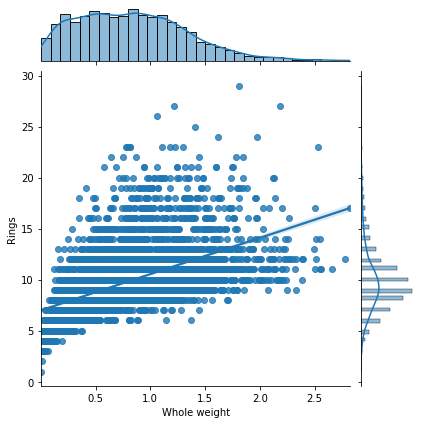

In [33]:
sns.jointplot(x=df['Whole weight'], y=df['Rings'], data=df, kind='reg')

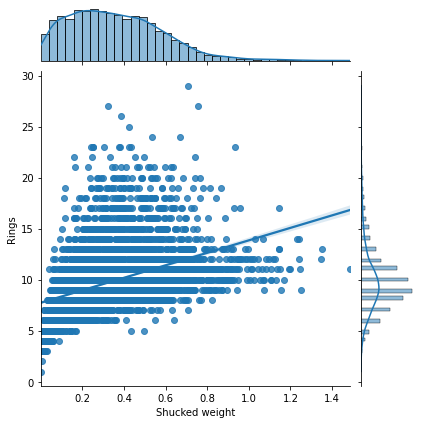

In [34]:
sns.jointplot(x=df['Shucked weight'], y=df['Rings'], data=df, kind='reg')

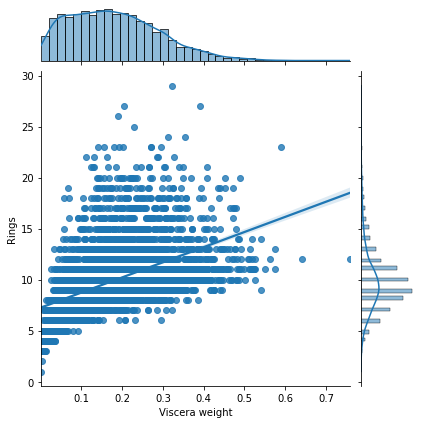

In [35]:
sns.jointplot(x=df['Viscera weight'], y=df['Rings'], data=df, kind='reg')

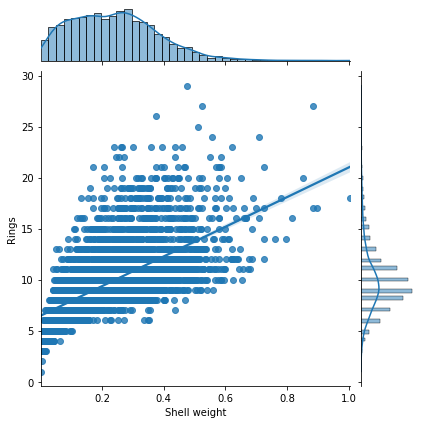

In [36]:
sns.jointplot(x=df['Shell weight'], y=df['Rings'], data=df, kind='reg')

<AxesSubplot:>

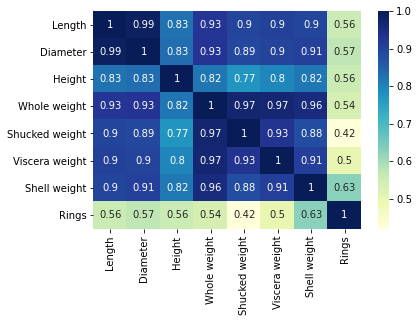

In [38]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [39]:
X = df['Shell weight']
Y = df['Rings']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', y_test.shape)

Train - Predictors shape (3341, 1)
Test - Predictors shape (836, 1)
Train - Target shape (3341, 1)
Test - Target shape (836, 1)


In [41]:
# calculate co-efficient
def theta_calc(x_train, y_train): 
    #Initializing all variables
    n_data = x_train.shape[0]
    
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)

    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)

    return theta

In [42]:
def predict_func(slope,intercept,x_test):
    
    pred = []
    n_data = x_test.shape[0]
    for i in range(n_data):
        pred.append((slope * x_test[i] + intercept))
             
    return pred

In [43]:
def mse_calc(prediction, y_test):
    
    total_data = len(prediction)
    error = 0
    error = (np.sum((prediction - y_test)**2))/total_data
    return error

In [44]:
def rsq(prediction, y_test):

    total_data = len(prediction)
    
    #Average of total prediction 
    y_avg = np.sum(y_test)/total_data
    
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    r2 = 1 - (res_err / tot_err)
    return r2

In [45]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1]
print('Intercept of the model', intercept)
print('Slope of the model', slope)

Intercept of the model [6.50576054]
Slope of the model [14.34765032]


In [46]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)

In [47]:
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

R squared value 0.4008530955550855


In [53]:
#MSE calculation
pred_df = pd.DataFrame(prediction)
pred_df.columns=['Rings']
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)

Mean squared error of the model 6.485891088761806


In [54]:
error = (np.sum((prediction - y_test)**2))/len(prediction)
error

6.485891088761806

Text(0, 0.5, 'Residual')

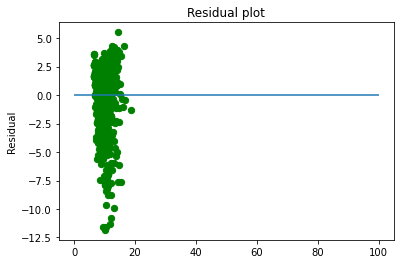

In [55]:
#Residual plot
plt.scatter(prediction, prediction - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')

In [56]:
pred_df.head()

,Rings
0,11.168747
1,10.020935
2,11.312223
3,11.957868
4,9.590505


In [57]:
y_test[1:6]

array([[ 8],
       [16],
       [ 9],
       [14],
       [11]], dtype=int64)

### Using Scikit-Learn

In [58]:
cls = LinearRegression()
cls.fit(x_train,y_train)

LinearRegression()

In [59]:
print('Co-efficient of linear regression',cls.coef_)

Co-efficient of linear regression [[14.34765032]]


In [60]:
print('Intercept of linear regression model',cls.intercept_)

Intercept of linear regression model [6.50576054]


In [61]:
print('Mean Square Error', mean_squared_error(y_test, prediction))

Mean Square Error 6.485891088761806


In [62]:
print('Model R^2 Square value', r2_score(y_test, prediction))

Model R^2 Square value 0.4008530955550855


Text(0.5, 1.0, 'Linear Regression')

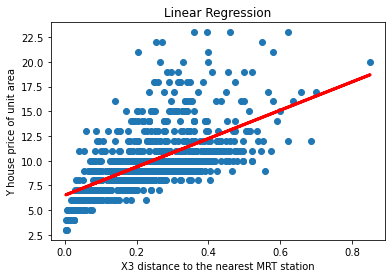

In [63]:
plt.scatter(x_test, y_test)
plt.plot(x_test, prediction, color='red', linewidth=3)
plt.xlabel('X3 distance to the nearest MRT station')
plt.ylabel('Y house price of unit area')
plt.title('Linear Regression')

Text(0, 0.5, 'Residual')

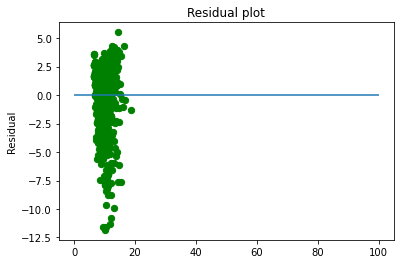

In [64]:
#Residual plot
plt.scatter(cls.predict(x_test), cls.predict(x_test) - y_test, c='g', s = 40)
plt.hlines(y=0, xmin=0, xmax=100)
plt.title('Residual plot')
plt.ylabel('Residual')